# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import math
from matplotlib.colors import ListedColormap
df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
print(df.head())
df.info()

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


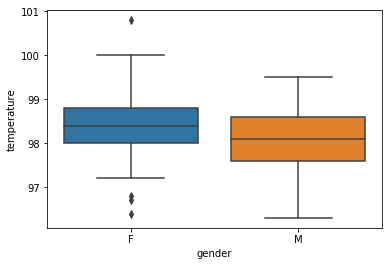

In [3]:
# Since a lot of statistical test requires that data is always normally distributed, it is therefore a necessity to always 
# check if the distribution is normally distributed or not.
# Checking if the data is normally distributed can be done by visualizing the data or by doing necessary tests
# Using a Box plot to visualize if it's normally distributed or not.
_ = sns.boxplot(x = 'gender', y ='temperature', data=df)
plt.show()
# Since the box plot is symmetrical with mean and median values equal, it therefore shows that the temperature distribution
# with some female temperatures being outliers, this makes the temperature normally distributed.

In [4]:
# Here the Null hypothesis is that the data is normally distributed and the alternative hypothesis is that the 
# data is not normally distributed.
# Normality test on temperature 
print('Mean of temperature column is: ', df['temperature'].mean())
print('Standard deviation of temperature column is:', df['temperature'].std())

Mean of temperature column is:  98.24923076923078
Standard deviation of temperature column is: 0.7331831580389454


In [5]:
# Using the Shapiro-Wilk Test to test for normality.
# If the p_value>0.05, we fail to reject the null hypothesis but if p_value<0.05, the null value is rejected meaning the data is 
# not normally distributed.
from scipy import stats
stats.shapiro(df['temperature'])

# From the output, the test statistics is 0.99 and the p_value is 0.23 
# Since the p_value> 0.05, the distribution is therefore normally distributed meaning further statistical tests can be performed.

(0.9865769743919373, 0.2331680953502655)

['F' 'M']
['red', 'blue']


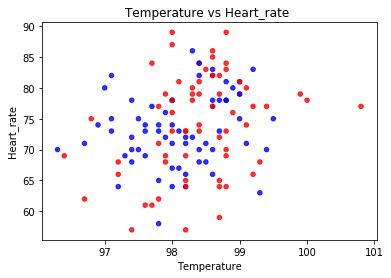

In [6]:
# The sample size is large as there are 130 observations.
# To know if the observations are dependent or independent,  a line plot showing the relationship between temperature and Heart-rate
cm = plt.cm.RdBu
cm_bright = (ListedColormap(['red', 'blue']))
print(df['gender'].unique())
print(cm_bright.colors)
df.plot.scatter('temperature','heart_rate',c=[cm_bright.colors[i] for i in df.gender=="M"],alpha=0.8, marker='o', figsize=(6,4))
plt.xlabel('Temperature')
plt.ylabel('Heart_rate')
plt.title('Temperature vs Heart_rate ')
plt.show()
# From this scatter plot, temperature increase increases the heart-rates 
# Most of the heart-rate values are concentrated at 70 to 85 and these values are achieved at the temperature range of 98 to 99 degree Farenheit
#  This therefore shows that the two features are dependent as an increase in temperature causes increase in heart-rate


In [7]:
# One sample test is suitable as the test is performed only on one feature which is the temperature.
# since the number of observations is greater than 50, the Z-score is therefore most suitable 

# Boostrap hypothesis testing
# Stating the null and alternative hypothesis
# Ho: mean = 98.6
# Ha: mean <> 98.6
# significancce level is 5%
# test statistics is the sample mean which is 98.25
tmean = df['temperature'].mean()

# subtract this mean from each temperature value and add the null hypothesis value
df['mean subtract'] = df['temperature'] - tmean + 98.6
mean2 = df['mean subtract'].mean()
print('The new mean is ', mean2)

The new mean is  98.59999999999992


mean of replicates is 98.59954930769231
Standard deviation of replicates is 0.06460890453399462


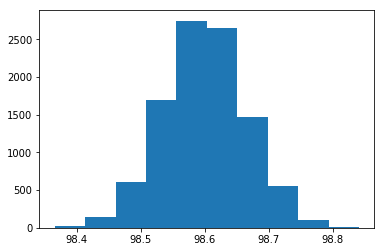

In [8]:
# select observations at random 10000 times from sample
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

# Bootstrap replicate function 
def draw_bs_reps(data, func, size=1):
    # bs_replicates an array of replicates
    bs_replicates = np.empty(size)

    # loop to generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates
# Take bootstrap replicates of temp translated impact 
bs_replicates = draw_bs_reps(df['mean subtract'], np.mean, 10000)
plt.hist(bs_replicates)
print('mean of replicates is', bs_replicates.mean())     
print('Standard deviation of replicates is', bs_replicates.std()) 

In [9]:
# Computing fraction of replicates that are less than the mean
p = np.sum(bs_replicates <= np.mean(bs_replicates)) / 10000

# Print the p-value
print('p_value= ', "%0.4f" % (p))
# If p_value > 0.05, the null hypothesis is supported else if p_value < 0.05 the null hypothesis is rejected.
# The null hypothesis is therefore supported and the alternative hypothesis is rejected since p_value > 0.05 

p_value=  0.5017


In [10]:
# Frequentiest statistical testing
# Z test will be done with a one sample test
# To calculate the z test using values from above analysis
sample_mean = 98.60
sample_size = 100
population_mean = 98.25 
sample_std = 0.06
z_score = (98.5 - 98.25) / (0.06 * math.sqrt(100))
print("Z_score is ", z_score)
# This is the probability that z < 98.5
# from the left z table, 0.4 and 0.01 intersects at 0.6591
p_zscore = 0.6591
print('Probability of having a mean lesser than the sample mean p(z<98.5) is ', p_zscore )

Z_score is  0.4166666666666667
Probability of having a mean lesser than the sample mean p(z<98.5) is  0.6591


In [17]:
# t test one sample
# Using the t table, the sample size has to be less than 30
# Take bootstrap replicates of temp translated impact 
bs_replicates = draw_bs_reps(df['mean subtract'], np.mean, 30)
print('Mean of replicates is', bs_replicates.mean())    
print('Standard deviation of replicates is', bs_replicates.std())

sample_mean = 98.61
sample_size = 30
population_mean = 98.25 
sample_std = 0.055  #slightly smaller from that of z score
t_score = (98.5 - 98.25) / (0.06 * math.sqrt(30))
print("T_score is ", "%.3f" %(t_score))   
# from the t table, the upper tail probability of a t value 0f 0.8 must lie between 0.025 and 0.01 
print('Upper tail probability of t value of 0.8 must lie between 0.25 and 0.1')

Mean of replicates is 98.58582051282052
Standard deviation of replicates is 0.05542508611576533
T_score is  0.761
Upper tail probability of t value of 0.8 must lie between 0.25 and 0.1


In [12]:
# working on a sample of 10 random values
bs_replicates = draw_bs_reps(df['mean subtract'], np.mean, 10)
print('mean of replicates is', bs_replicates.mean())     # which is still same as the hypothesis testing value.
print('Standard deviation of replicates is', bs_replicates.std())
# with samller sample space, the most suitable is t tes
sample_mean = 98.63
sample_size = 10
population_mean = 98.25 
sample_std = 0.062  
t_score = (98.5 - 98.25) / (0.06 * math.sqrt(10))
print('t score is', t_score)
# from the t table, degrees of freedom is 9 and t value to know the probability.
print('Upper tail probability of t value of 1.3 is 0.1')

mean of replicates is 98.57507692307692
Standard deviation of replicates is 0.03679497007044417
t score is 1.3176156917368247
Upper tail probability of t value of 1.3 is 0.1


In [13]:
# Confidence interval using the t-score
CI_1 = sample_mean - t_score * (0.06 * math.sqrt(10))
CI_2 = sample_mean + t_score * (0.06 * math.sqrt(10))
ME = t_score * (0.06 * math.sqrt(10))
print('Margin of error is ', "%.2f" %(ME))
print('Confidence Interval is ', "%.2f" %(CI_1), ':', "%.2f" %(CI_2))

Margin of error is  0.25
Confidence Interval is  98.38 : 98.88


In [14]:
# z score with the 10 samples
bs_replicates = draw_bs_reps(df['mean subtract'], np.mean, 10)
print('mean of replicates is', bs_replicates.mean())     
print('Standard deviation of replicates is', bs_replicates.std())
# with samller sample space, the most suitable is t test but applying the z test.
sample_mean = 98.59
sample_size = 10
population_mean = 98.25 
sample_std = 0.062  
z_score = (98.5 - 98.25) / (0.06 * math.sqrt(10))
# from the left z table
# probability of having a mean lower than the sample mean is 0.9049
print('z values from the Z table is 0.9049')

mean of replicates is 98.609
Standard deviation of replicates is 0.06981213166642873
z values from the Z table is 0.9049


['F' 'M']
['red', 'blue']


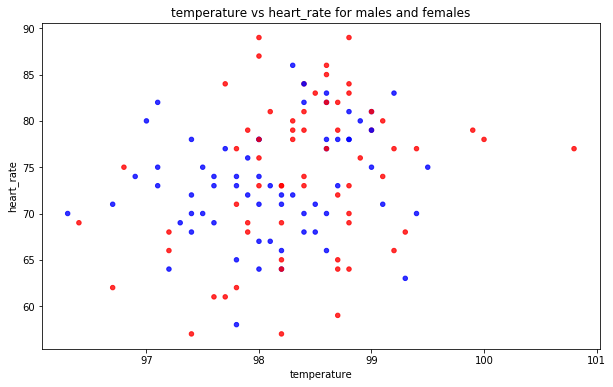

In [15]:
# Difference between male and female temperatures
cm = plt.cm.RdBu
cm_bright = (ListedColormap(['red', 'blue']))
print(df['gender'].unique())
print(cm_bright.colors)
df.plot.scatter('temperature','heart_rate',c=[cm_bright.colors[i] for i in df.gender=="M"],alpha=0.8, marker='o', figsize=(10,6))
plt.xlabel('temperature')
plt.ylabel('heart_rate')
plt.title('temperature vs heart_rate for males and females')
plt.show()

* From the graph, most Men have an average temperature and some of them extending to lower values around 97 degree farenheit outliering at the left part of the graph due to those smaller temperature values.
* Most women have high body temperatures and some extending to abnormally higher temperatures outliering at the right section of the graph
* Very few women have temperatures less than the population mean
* To conclude, the men have few outliers lower than the mean temperature whereas women have outliers higher than the mean temperature.